In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

# ===== STEP 1: LOAD DATA =====
print("="*70)
print("STEP 1: LOADING DATA")
print("="*70)
df = pd.read_csv('weatherAUS.csv')
print(f"Original dataset shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")


STEP 1: LOADING DATA
Original dataset shape: (145460, 23)
Total missing values: 343248


In [2]:

df = pd.read_csv('weatherAUS.csv')

print(f"Original dataset shape: {df.shape}")
print(f"Total rows: {len(df):,}")


# ===== STEP 2: PRESERVE IMPORTANT ROWS (Rain Days) =====
print("\n" + "="*80)
print("STEP 2: IDENTIFYING ROWS TO PRESERVE")
print("="*80)

# Identify rows where RainTomorrow or RainToday = 'Yes'
rain_rows = df[
    (df['RainTomorrow'] == 'Yes') | (df['RainToday'] == 'Yes')
].copy()

# Identify other rows
other_rows = df[
    (df['RainTomorrow'] != 'Yes') & (df['RainToday'] != 'Yes')
].copy()

print(f"Rows with Rain (Yes): {len(rain_rows):,}")
print(f"Other rows: {len(other_rows):,}")


# ===== STEP 3: CLEAN NON-RAIN ROWS =====
print("\n" + "="*80)
print("STEP 3: CLEANING NON-RAIN ROWS")
print("="*80)

# Drop rows with ANY nulls from non-rain rows only
other_rows_clean = other_rows.dropna()

print(f"Non-rain rows before cleaning: {len(other_rows):,}")
print(f"Non-rain rows after cleaning: {len(other_rows_clean):,}")
print(f"Dropped {len(other_rows) - len(other_rows_clean):,} rows with nulls")


# ===== STEP 4: HANDLE NULLS IN RAIN ROWS =====
print("\n" + "="*80)
print("STEP 4: HANDLING NULLS IN RAIN ROWS (IMPUTATION)")
print("="*80)

from sklearn.impute import SimpleImputer

# Check nulls in rain rows
null_counts = rain_rows.isnull().sum()
print(f"Null values in rain rows:\n{null_counts[null_counts > 0]}")

# Impute numerical columns with median
numerical_cols = rain_rows.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 0:
    num_imputer = SimpleImputer(strategy='median')
    rain_rows[numerical_cols] = num_imputer.fit_transform(rain_rows[numerical_cols])
    print(f"\n[SUCCESS] Imputed {len(numerical_cols)} numerical columns with median")

# Impute categorical columns with mode
categorical_cols = rain_rows.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if rain_rows[col].isnull().sum() > 0:
        mode_value = rain_rows[col].mode()[0] if len(rain_rows[col].mode()) > 0 else 'Unknown'
        rain_rows[col].fillna(mode_value, inplace=True)
        
print(f"[SUCCESS] Imputed {len(categorical_cols)} categorical columns with mode")


# ===== STEP 5: COMBINE DATA =====
print("\n" + "="*80)
print("STEP 5: COMBINING CLEANED DATA")
print("="*80)

df_clean = pd.concat([rain_rows, other_rows_clean], axis=0).reset_index(drop=True)

print(f"Final dataset shape: {df_clean.shape}")
print(f"Total rows: {len(df_clean):,}")
print(f"  - Rain rows (preserved): {len(rain_rows):,}")
print(f"  - Other rows (cleaned): {len(other_rows_clean):,}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")


df = df_clean.copy()
print(f"[INFO] Using all {len(df_clean):,} rows (less than target)")

print(f"\nFinal dataset for preprocessing: {df.shape}")
print(f"\nRainTomorrow distribution:")
print(df['RainTomorrow'].value_counts())


Original dataset shape: (145460, 23)
Total rows: 145,460

STEP 2: IDENTIFYING ROWS TO PRESERVE
Rows with Rain (Yes): 49,160
Other rows: 96,300

STEP 3: CLEANING NON-RAIN ROWS
Non-rain rows before cleaning: 96,300
Non-rain rows after cleaning: 37,274
Dropped 59,026 rows with nulls

STEP 4: HANDLING NULLS IN RAIN ROWS (IMPUTATION)
Null values in rain rows:
MinTemp            227
MaxTemp            141
Rainfall           676
Evaporation      21493
Sunshine         23339
WindGustDir       3865
WindGustSpeed     3829
WindDir9am        2953
WindDir3pm        1570
WindSpeed9am       476
WindSpeed3pm      1064
Humidity9am        734
Humidity3pm       1434
Pressure9am       4862
Pressure3pm       4870
Cloud9am         17191
Cloud3pm         18024
Temp9am            393
Temp3pm           1114
RainToday          676
RainTomorrow       425
dtype: int64

[SUCCESS] Imputed 16 numerical columns with median
[SUCCESS] Imputed 7 categorical columns with mode

STEP 5: COMBINING CLEANED DATA


C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_34564\852704475.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rain_rows[col].fillna(mode_value, inplace=True)


Final dataset shape: (86434, 23)
Total rows: 86,434
  - Rain rows (preserved): 49,160
  - Other rows (cleaned): 37,274
Missing values: 0
[INFO] Using all 86,434 rows (less than target)

Final dataset for preprocessing: (86434, 23)

RainTomorrow distribution:
RainTomorrow
No     54132
Yes    32302
Name: count, dtype: int64


In [3]:
print("="*80)
print("COMPREHENSIVE DATA VISUALIZATION & INSPECTION")
print("="*80)

# ===== 1. DATASET OVERVIEW =====
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nBasic statistics:")
print(df.describe())


COMPREHENSIVE DATA VISUALIZATION & INSPECTION

1. DATASET OVERVIEW
Total rows: 86,434
Total columns: 23

Column names:
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

Data types:
float64    16
object      7
Name: count, dtype: int64

First few rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-09   Albury      9.7     31.9       0.0          3.6       5.3   
1  2008-12-10   Albury     13.1     30.1       1.4          3.6       5.3   
2  2008-12-11   Albury     13.4     30.4       0.0          3.6       5.3   
3  2008-12-12   Albury     15.9     21.7       2.2          3.6       5.3   
4  2008-12-13   Albury     15.9     18.6      15.6          3.6       5.3   

  WindGustDir  WindGustSp

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  86434.000000  86434.000000  86434.000000  86434.000000  86434.000000   
mean      12.989292     22.847670      3.860380      4.914476      6.866761   
std        6.290291      7.116126     10.608463      3.420492      3.397152   
min       -7.800000     -4.800000      0.000000      0.000000      0.000000   
25%        8.400000     17.400000      0.000000      3.200000      5.300000   
50%       12.700000     22.200000      0.000000      3.600000      5.700000   
75%       17.700000     28.100000      3.000000      6.400000      9.800000   
max       31.400000     48.100000    371.000000    145.000000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   86434.000000  86434.000000  86434.000000  86434.000000  86434.000000   
mean       41.808386     15.218710     19.524446     70.681294     55.408242   
std        13.730102      8.810014      8.870536

In [4]:
# ===== 2. MISSING DATA ANALYSIS =====
print("\n" + "="*80)
print("2. MISSING DATA ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df)) * 100,
    'Data_Type': df.dtypes.values
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]

print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Overall missing percentage: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")
print(f"Columns with missing data: {len(missing_data_filtered)}")



2. MISSING DATA ANALYSIS
Total missing values: 0
Overall missing percentage: 0.00%
Columns with missing data: 0


In [5]:
# ===== 3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE) =====
print("\n" + "="*80)
print("3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)")
print("="*80)

if 'RainTomorrow' in df.columns:
    target_counts = df['RainTomorrow'].value_counts()
    print(f"RainTomorrow distribution:")
    print(target_counts)
    print(f"\nClass Imbalance Ratio: {target_counts.iloc[0]/target_counts.iloc[1]:.2f}:1")
    print(f"Majority class: {target_counts.iloc[0]/len(df)*100:.2f}%")
    print(f"Minority class: {target_counts.iloc[1]/len(df)*100:.2f}%")
    


3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)
RainTomorrow distribution:
RainTomorrow
No     54132
Yes    32302
Name: count, dtype: int64

Class Imbalance Ratio: 1.68:1
Majority class: 62.63%
Minority class: 37.37%


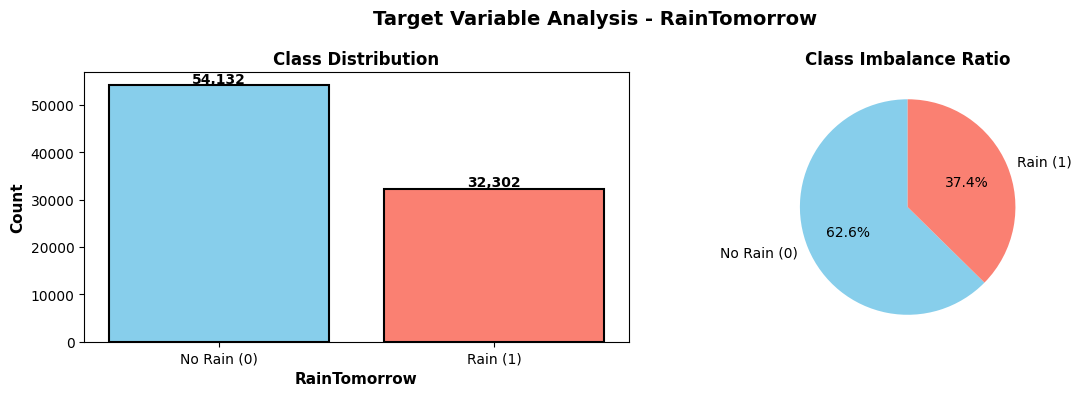

In [6]:

if 'RainTomorrow' in df.columns:

    # Visualize class imbalance
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Target Variable Analysis - RainTomorrow', fontsize=14, fontweight='bold')
    
    # Bar plot
    axes[0].bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'], 
                edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('RainTomorrow', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].set_title('Class Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['No Rain (0)', 'Rain (1)'])
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(target_counts.values, labels=['No Rain (0)', 'Rain (1)'], 
                autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
    axes[1].set_title('Class Imbalance Ratio', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    


In [7]:

# ===== 4. NUMERICAL FEATURES DISTRIBUTION =====
print("\n" + "="*80)
print("4. NUMERICAL FEATURES DISTRIBUTION")
print("="*80)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Filter out one-hot encoded columns
numerical_cols = [col for col in numerical_cols if df[col].nunique() > 2]

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")




4. NUMERICAL FEATURES DISTRIBUTION
Numerical columns (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


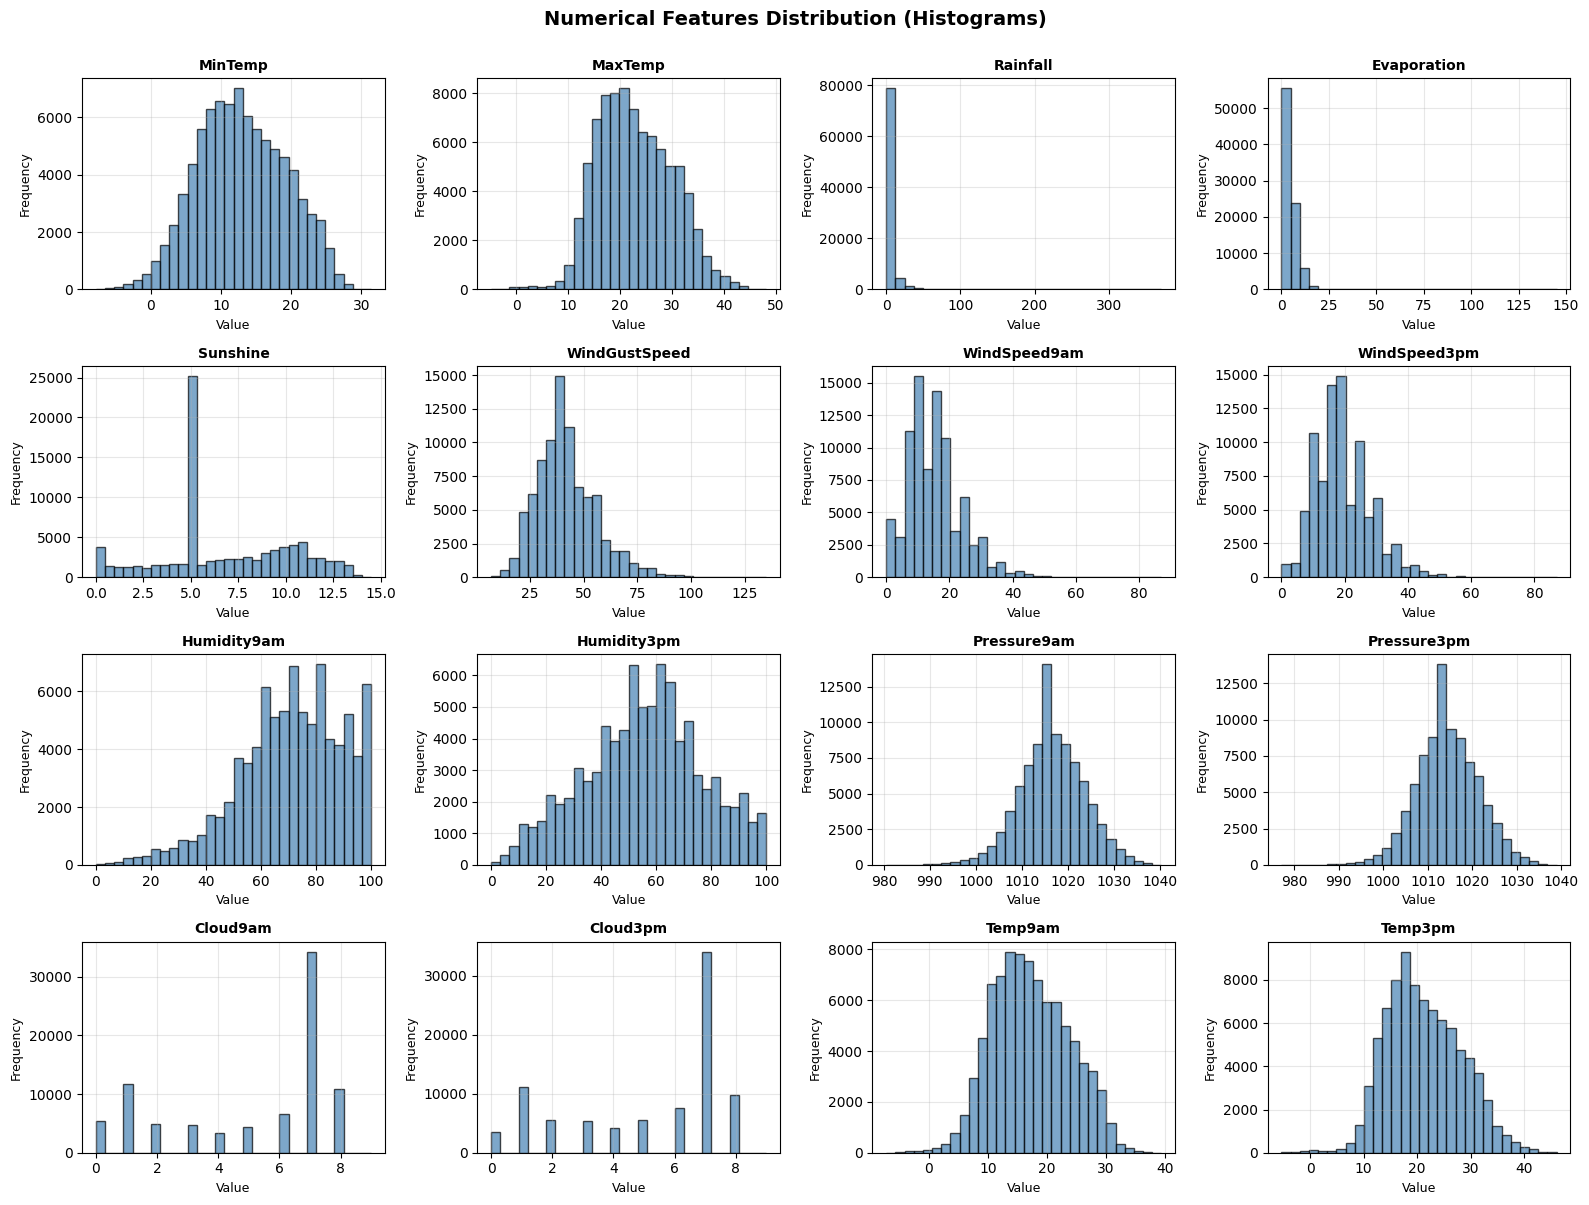

In [8]:
# Distribution plots
if len(numerical_cols) > 0:
    n_cols = 4
    n_rows = (len(numerical_cols[:16]) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
    fig.suptitle('Numerical Features Distribution (Histograms)', fontsize=14, fontweight='bold', y=1.00)
    axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numerical_cols[:16]):
        axes[i].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_xlabel('Value', fontsize=9)
        axes[i].set_ylabel('Frequency', fontsize=9)
        axes[i].grid(alpha=0.3)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [9]:
# ===== 5. OUTLIER DETECTION =====
print("\n" + "="*80)
print("5. OUTLIER DETECTION (IQR METHOD)")
print("="*80)

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f'{outlier_pct:.2f}%',
        'Lower_Bound': f'{lower_bound:.2f}',
        'Upper_Bound': f'{upper_bound:.2f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))




5. OUTLIER DETECTION (IQR METHOD)
      Feature  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
      MinTemp             39              0.05%       -5.55       31.65
      MaxTemp            216              0.25%        1.35       44.15
     Rainfall          12208             14.12%       -4.50        7.50
  Evaporation           4139              4.79%       -1.60       11.20
     Sunshine              0              0.00%       -1.45       16.55
WindGustSpeed           1412              1.63%        2.50       78.50
 WindSpeed9am           1830              2.12%       -7.50       36.50
 WindSpeed3pm           1845              2.13%       -3.50       40.50
  Humidity9am           1012              1.17%       20.00      124.00
  Humidity3pm              0              0.00%       -2.50      113.50
  Pressure9am           1472              1.70%      999.35     1034.15
  Pressure3pm           1148              1.33%      996.65     1032.25
     Cloud9am              0 

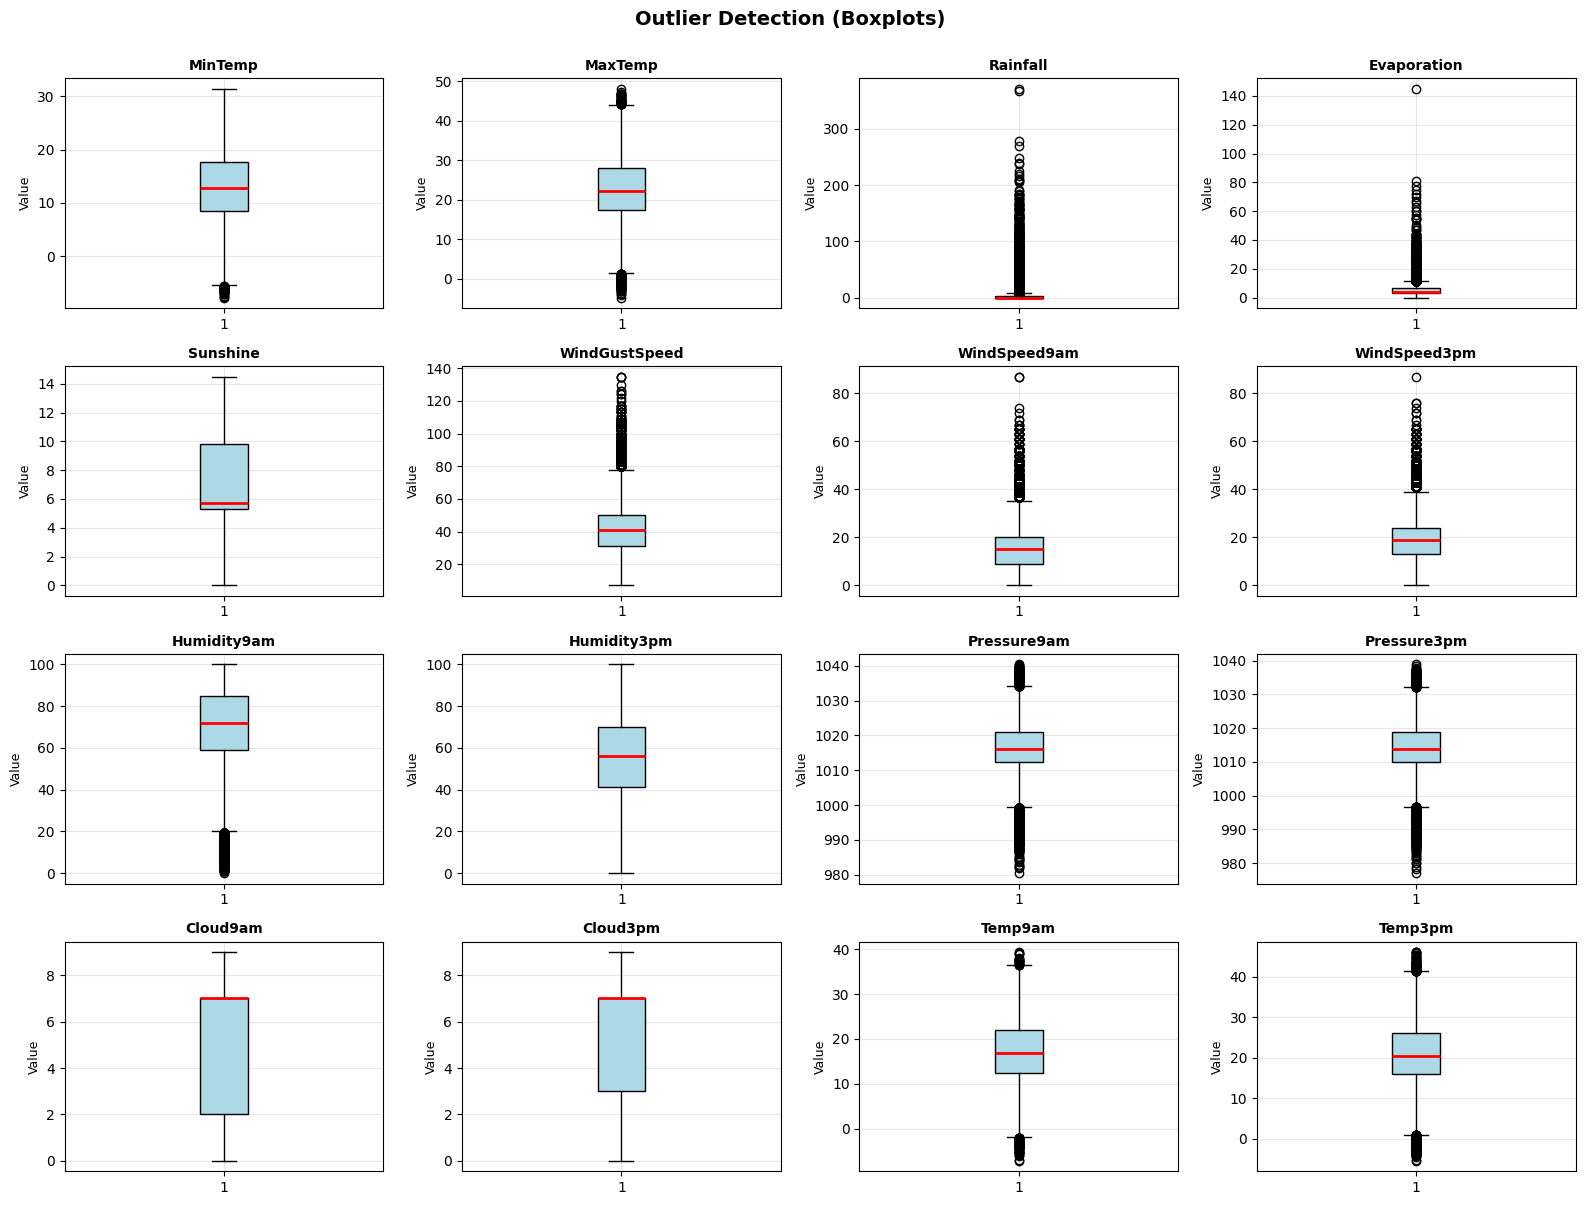

In [10]:
# Boxplots for outlier visualization
if len(numerical_cols) > 0:
    n_cols = 4
    n_rows = (len(numerical_cols[:16]) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
    fig.suptitle('Outlier Detection (Boxplots)', fontsize=14, fontweight='bold', y=1.00)
    axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numerical_cols[:16]):
        bp = axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                             boxprops=dict(facecolor='lightblue', edgecolor='black'),
                             medianprops=dict(color='red', linewidth=2),
                             whiskerprops=dict(color='black'),
                             capprops=dict(color='black'))
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_ylabel('Value', fontsize=9)
        axes[i].grid(alpha=0.3)
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [11]:
# ===== 6. CORRELATION ANALYSIS =====
print("\n" + "="*80)
print("6. CORRELATION ANALYSIS")
print("="*80)

if len(numerical_cols) > 0:
    correlation_matrix = df[numerical_cols].corr()
    
    print("Top 10 positive correlations (excluding self-correlation):")
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })
    corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
    print(corr_df.head(10).to_string(index=False))
    


6. CORRELATION ANALYSIS
Top 10 positive correlations (excluding self-correlation):
    Feature_1    Feature_2  Correlation
      MaxTemp      Temp3pm     0.971590
  Pressure9am  Pressure3pm     0.956081
      MinTemp      Temp9am     0.907136
      MaxTemp      Temp9am     0.895998
      Temp9am      Temp3pm     0.866197
      MinTemp      MaxTemp     0.762272
      MinTemp      Temp3pm     0.730668
  Humidity9am  Humidity3pm     0.685708
WindGustSpeed WindSpeed3pm     0.650163
     Cloud9am     Cloud3pm     0.647912


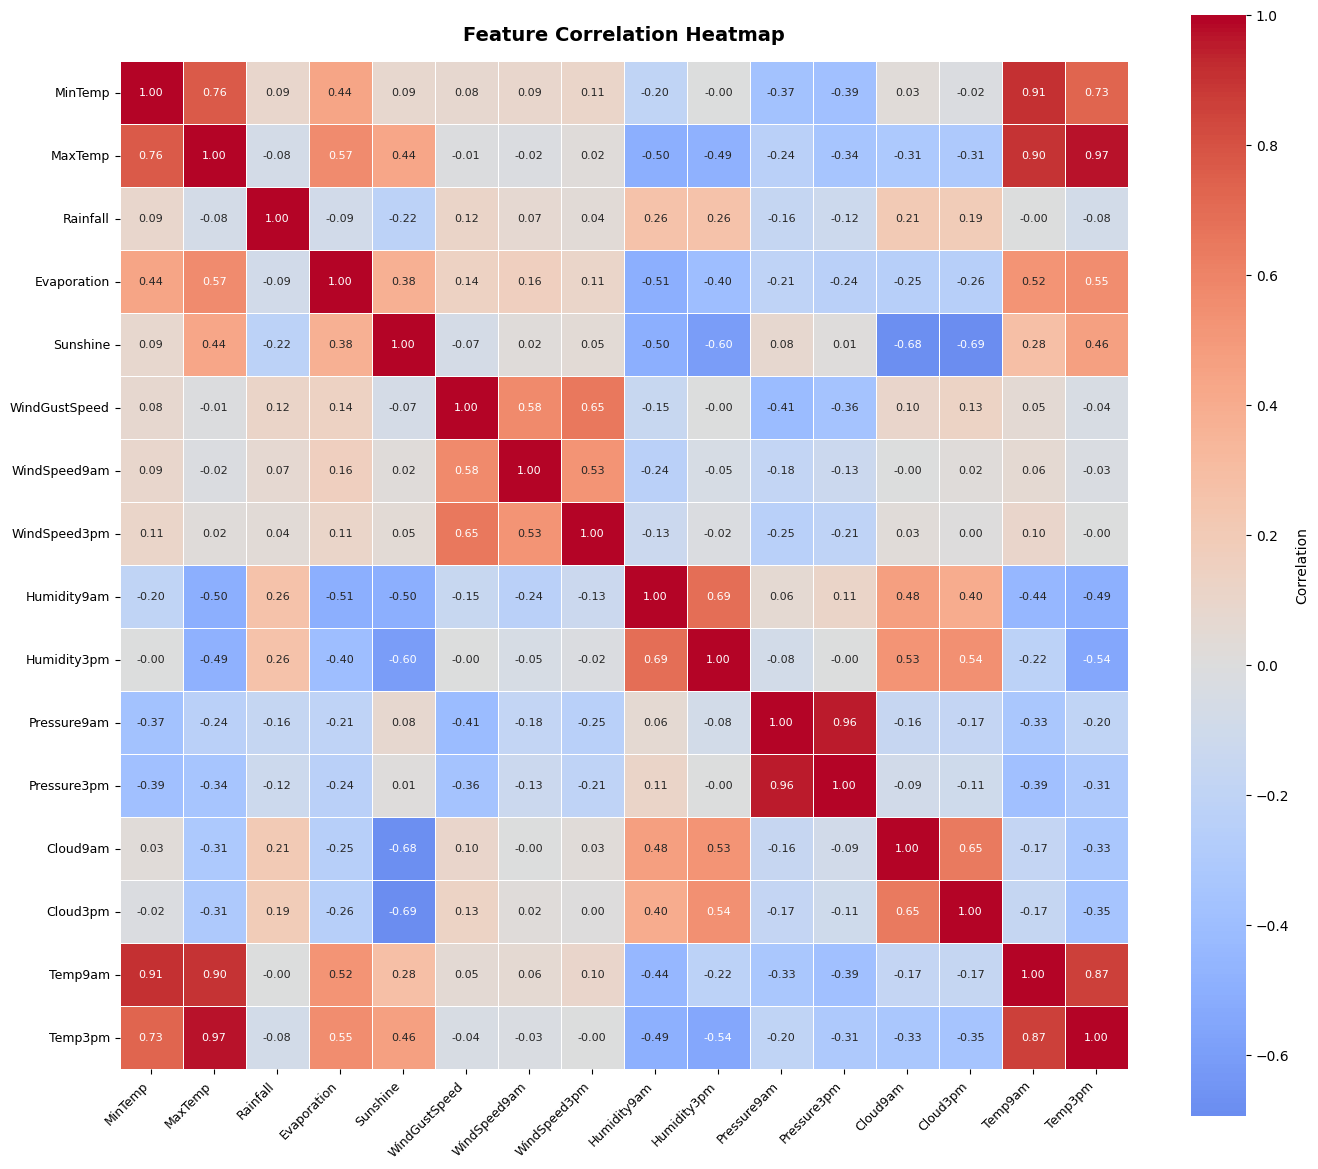

In [12]:
if len(numerical_cols) > 0:

    # Correlation heatmap WITH NUMBERS
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(correlation_matrix, 
                annot=True,              # Changed to True to show numbers
                fmt='.2f',               # Format numbers to 2 decimal places
                cmap='coolwarm', 
                center=0,
                square=True, 
                linewidths=0.5, 
                cbar_kws={'label': 'Correlation'},
                annot_kws={'size': 8})   # Font size for numbers
    ax.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.show()

 

In [13]:
# ===== 7. CATEGORICAL FEATURES ANALYSIS =====
print("\n" + "="*80)
print("7. CATEGORICAL FEATURES ANALYSIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

if len(categorical_cols) > 0: 
    for col in categorical_cols[:6]:  # Show first 6
        print(f"\n{col} - Value counts:")
        print(df[col].value_counts().head(10))



7. CATEGORICAL FEATURES ANALYSIS
Categorical columns (7): ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Date - Value counts:
Date
2013-09-17    46
2014-09-09    46
2010-09-04    45
2011-09-28    45
2010-05-30    44
2012-07-11    44
2011-11-08    43
2009-07-22    43
2010-09-03    43
2014-04-30    43
Name: count, dtype: int64

Location - Value counts:
Location
Darwin              3142
Perth               3089
Brisbane            3053
MelbourneAirport    2953
SydneyAirport       2950
PerthAirport        2938
Watsonia            2826
MountGambier        2741
NorfolkIsland       2740
Cairns              2728
Name: count, dtype: int64

WindGustDir - Value counts:
WindGustDir
W      10343
SW      5896
N       5880
SSW     5821
WSW     5819
S       5679
E       5499
SE      5449
SSE     5107
WNW     5065
Name: count, dtype: int64

WindDir9am - Value counts:
WindDir9am
N      10424
W       5702
SW      5562
E       5445
SSE     5384
SE      5308


In [14]:
# ===== 8. DATA SUMMARY =====
print("\n" + "="*80)
print("8. FINAL DATA INSPECTION SUMMARY")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Missing values: {df.isnull().sum().sum():,}")
print(f"Duplicate rows: {df.duplicated().sum():,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("DATA VISUALIZATION & INSPECTION COMPLETE")
print("="*80)



8. FINAL DATA INSPECTION SUMMARY
Total rows: 86,434
Total columns: 23
Numerical columns: 16
Categorical columns: 7
Missing values: 0
Duplicate rows: 0
Memory usage: 41.30 MB

DATA VISUALIZATION & INSPECTION COMPLETE


In [15]:
# ===== COMPLETE DATA CLEANING & PREPROCESSING PIPELINE =====

print("="*80)
print("DATA CLEANING & PREPROCESSING PIPELINE")

# ===== STEP 1: DROP UNNECESSARY COLUMNS =====
print("\n" + "="*80)
print("STEP 1: REMOVING UNNECESSARY COLUMNS")
print("="*80)

columns_to_drop = ['Date', 'Location', 'Rainfall']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)
print(f"Dropped columns: {existing_cols_to_drop}")
print(f"Shape after dropping: {df.shape}")


DATA CLEANING & PREPROCESSING PIPELINE

STEP 1: REMOVING UNNECESSARY COLUMNS
Dropped columns: ['Date', 'Location', 'Rainfall']
Shape after dropping: (86434, 20)


In [16]:
# ===== STEP 2: IDENTIFY COLUMN TYPES =====
print("\n" + "="*80)
print("STEP 2: IDENTIFYING COLUMN TYPES")
print("="*80)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'RainTomorrow' in numerical_cols:
    numerical_cols.remove('RainTomorrow')
if 'RainTomorrow' in categorical_cols:
    categorical_cols.remove('RainTomorrow')

if 'RainToday' in numerical_cols:
    numerical_cols.remove('RainToday')
if 'RainToday' in categorical_cols:
    categorical_cols.remove('RainToday')

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")



STEP 2: IDENTIFYING COLUMN TYPES
Numerical columns (15): ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical columns (3): ['WindGustDir', 'WindDir9am', 'WindDir3pm']


In [17]:
# ===== STEP 5: HANDLE DUPLICATES =====
print("\n" + "="*80)
print("STEP 5: REMOVING DUPLICATE ROWS")
print("="*80)

duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"Shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found")



STEP 5: REMOVING DUPLICATE ROWS
Duplicate rows found: 10
Removed 10 duplicate rows
Shape after removing duplicates: (86424, 20)


In [18]:
#===== STEP 6: ENCODE CATEGORICAL VARIABLES =====
print("\n" + "="*80)
print("STEP 6: ENCODING CATEGORICAL VARIABLES")
print("="*80)

binary_cols = []
multi_category_cols = []

for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multi_category_cols.append(col)

if 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype == 'object':
    if df['RainTomorrow'].nunique() == 2:
        binary_cols.append('RainTomorrow')
        
if 'RainToday' in df.columns and df['RainToday'].dtype == 'object':
    if df['RainToday'].nunique() == 2:
        binary_cols.append('RainToday')

print(f"Binary categorical columns ({len(binary_cols)}): {binary_cols}")
print(f"Multi-category columns ({len(multi_category_cols)}): {multi_category_cols}")

if len(binary_cols) > 0:
    print("\nLabel encoding binary columns...")
    le = LabelEncoder()
    for col in binary_cols:
        df[col] = le.fit_transform(df[col])
        unique_values = df[col].unique()
        print(f"  - {col}: Encoded to {unique_values}")

if len(multi_category_cols) > 0:
    print(f"\nOne-hot encoding {len(multi_category_cols)} multi-category columns...")
    print(f"Columns to encode: {multi_category_cols}")
    
    original_shape = df.shape
    df = pd.get_dummies(df, columns=multi_category_cols, dtype=int)
    
    print(f"[SUCCESS] One-hot encoding complete")
    print(f"Shape changed from {original_shape} to {df.shape}")
    print(f"Added {df.shape[1] - original_shape[1]} new columns")



STEP 6: ENCODING CATEGORICAL VARIABLES
Binary categorical columns (2): ['RainTomorrow', 'RainToday']
Multi-category columns (3): ['WindGustDir', 'WindDir9am', 'WindDir3pm']

Label encoding binary columns...
  - RainTomorrow: Encoded to [1 0]
  - RainToday: Encoded to [0 1]

One-hot encoding 3 multi-category columns...
Columns to encode: ['WindGustDir', 'WindDir9am', 'WindDir3pm']
[SUCCESS] One-hot encoding complete
Shape changed from (86424, 20) to (86424, 65)
Added 45 new columns


In [19]:
# ===== STEP 8: CHECK FOR ALL-ZERO ROWS IN ONE-HOT ENCODED COLUMNS =====
print("\n" + "="*80)
print("STEP 8: VERIFYING ONE-HOT ENCODING INTEGRITY")
print("="*80)

one_hot_prefixes = [col.rsplit('_', 1)[0] for col in multi_category_cols]
for prefix in set(one_hot_prefixes):
    encoded_cols = [col for col in df.columns if col.startswith(prefix + '_')]
    if encoded_cols:
        all_zero_rows = (df[encoded_cols].sum(axis=1) == 0).sum()
        print(f"{prefix}: {all_zero_rows} rows with all zeros")

print("[SUCCESS] One-hot encoding verification complete")



STEP 8: VERIFYING ONE-HOT ENCODING INTEGRITY
WindDir9am: 0 rows with all zeros
WindDir3pm: 0 rows with all zeros
WindGustDir: 0 rows with all zeros
[SUCCESS] One-hot encoding verification complete


In [20]:
# ===== STEP 9: HANDLE OUTLIERS =====
print("\n" + "="*80)
print("STEP 9: HANDLING OUTLIERS (CAPPING METHOD)")
print("="*80)

numerical_cols_to_cap = [col for col in df.columns 
                         if df[col].dtype in ['float64', 'int64'] 
                         and df[col].nunique() > 2
                         and col != 'RainTomorrow']

print(f"Numerical columns to cap ({len(numerical_cols_to_cap)}): {numerical_cols_to_cap}")

outliers_capped = 0
for col in numerical_cols_to_cap:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    if outliers_before > 0:
        outliers_capped += outliers_before
        print(f"  - {col}: Capped {outliers_before} outliers")

print(f"\n[SUCCESS] Total outliers capped: {outliers_capped}")



STEP 9: HANDLING OUTLIERS (CAPPING METHOD)
Numerical columns to cap (15): ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
  - MinTemp: Capped 1683 outliers
  - MaxTemp: Capped 1715 outliers
  - Evaporation: Capped 1476 outliers
  - Sunshine: Capped 669 outliers
  - WindGustSpeed: Capped 1316 outliers
  - WindSpeed9am: Capped 814 outliers
  - WindSpeed3pm: Capped 1210 outliers
  - Humidity9am: Capped 810 outliers
  - Humidity3pm: Capped 1547 outliers
  - Pressure9am: Capped 1707 outliers
  - Pressure3pm: Capped 1716 outliers
  - Cloud9am: Capped 1 outliers
  - Cloud3pm: Capped 1 outliers
  - Temp9am: Capped 1707 outliers
  - Temp3pm: Capped 1695 outliers

[SUCCESS] Total outliers capped: 18067


In [21]:
# ===== STEP 7: STANDARDIZE NUMERICAL FEATURES =====
print("\n" + "="*80)
print("STEP 7: STANDARDIZING NUMERICAL FEATURES")
print("="*80)

from sklearn.preprocessing import StandardScaler

# Identify columns to standardize (continuous numerical features only)
cols_to_standardize = [col for col in df.columns 
                       if df[col].dtype in ['float64', 'int64'] 
                       and df[col].nunique() > 2
                       and col != 'RainTomorrow']

print(f"Columns to standardize ({len(cols_to_standardize)}): {cols_to_standardize}")

if len(cols_to_standardize) > 0:
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
    
    print("\n[SUCCESS] Standardization complete")
    print(f"Standardized features - Sample statistics:")
    print(df_scaled[cols_to_standardize].describe().loc[['mean', 'std']].round(3))
    
    # Update df with scaled version
    df = df_scaled
else:
    print("No columns to standardize")


STEP 7: STANDARDIZING NUMERICAL FEATURES
Columns to standardize (15): ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

[SUCCESS] Standardization complete
Standardized features - Sample statistics:
      MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
mean     -0.0     -0.0         -0.0      -0.0           -0.0          -0.0   
std       1.0      1.0          1.0       1.0            1.0           1.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
mean          -0.0          0.0         -0.0         -0.0         -0.0   
std            1.0          1.0          1.0          1.0          1.0   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  
mean       0.0      -0.0      0.0     -0.0  
std        1.0       1.0      1.0      1.0  


In [22]:
# ===== STEP 8: SAVE PREPROCESSED DATA =====
print("\n" + "="*80)
print("STEP 8: SAVING PREPROCESSED DATA")
print("="*80)

# Save the complete preprocessed dataset
output_filename = 'weatherAUS_preprocessed.csv'
df.to_csv(output_filename, index=False)

print(f"[SUCCESS] Saved preprocessed dataset to: {output_filename}")
print(f"Shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("FILE SAVED - READY FOR MODEL TRAINING!")
print("="*80)
print("To load this data in another notebook:")
print("  df = pd.read_csv('weatherAUS_preprocessed.csv')")



STEP 8: SAVING PREPROCESSED DATA
[SUCCESS] Saved preprocessed dataset to: weatherAUS_preprocessed.csv
Shape: (86424, 65)
Total rows: 86,424
Total columns: 65
Memory usage: 43.52 MB

FILE SAVED - READY FOR MODEL TRAINING!
To load this data in another notebook:
  df = pd.read_csv('weatherAUS_preprocessed.csv')
